### Some common terms to remember:

* Corpus
* Vocabulary
* Document
* Word

# Bag of words

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.DataFrame({"text":["people watch dswithbappy",
                         "dswithbappy watch dswithbappy",
                         "people write comment",
                          "dswithbappy write comment"],"output":[1,1,0,0]})

df

,text,output
0,people watch dswithbappy,1
1,dswithbappy watch dswithbappy,1
2,people write comment,0
3,dswithbappy write comment,0


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [5]:
bow = cv.fit_transform(df['text'])

In [7]:
#vocabulary
print(cv.vocabulary_)

{'people': 2, 'watch': 3, 'dswithbappy': 1, 'write': 4, 'comment': 0}


In [8]:
bow.toarray()

array([[0, 1, 1, 1, 0],
       [0, 2, 0, 1, 0],
       [1, 0, 1, 0, 1],
       [1, 1, 0, 0, 1]])

In [9]:
print(bow[0].toarray())
print(bow[1].toarray())
print(bow[2].toarray())

[[0 1 1 1 0]]
[[0 2 0 1 0]]
[[1 0 1 0 1]]


In [10]:
# new
cv.transform(['Bappy watch dswithbappy']).toarray()

array([[0, 1, 0, 1, 0]])

In [11]:
X = bow.toarray()
y = df['output']

# N-grams

In [12]:
df = pd.DataFrame({"text":["people watch dswithbappy",
                         "dswithbappy watch dswithbappy",
                         "people write comment",
                          "dswithbappy write comment"],"output":[1,1,0,0]})

df

,text,output
0,people watch dswithbappy,1
1,dswithbappy watch dswithbappy,1
2,people write comment,0
3,dswithbappy write comment,0


In [13]:
# BI grams
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(2,2))

In [14]:
bow = cv.fit_transform(df['text'])

In [15]:
print(cv.vocabulary_)

{'people watch': 2, 'watch dswithbappy': 4, 'dswithbappy watch': 0, 'people write': 3, 'write comment': 5, 'dswithbappy write': 1}


In [16]:
print(bow[0].toarray())
print(bow[1].toarray())
print(bow[2].toarray())

[[0 0 1 0 1 0]]
[[1 0 0 0 1 0]]
[[0 0 0 1 0 1]]


In [17]:
#Ti gram
# BI grams
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(3,3))

In [18]:
bow = cv.fit_transform(df['text'])

In [19]:
print(cv.vocabulary_)

{'people watch dswithbappy': 2, 'dswithbappy watch dswithbappy': 0, 'people write comment': 3, 'dswithbappy write comment': 1}


In [20]:
print(bow[0].toarray())
print(bow[1].toarray())
print(bow[2].toarray())

[[0 0 1 0]]
[[1 0 0 0]]
[[0 0 0 1]]


# TF-IDF (Term frequency- Inverse document frequency)


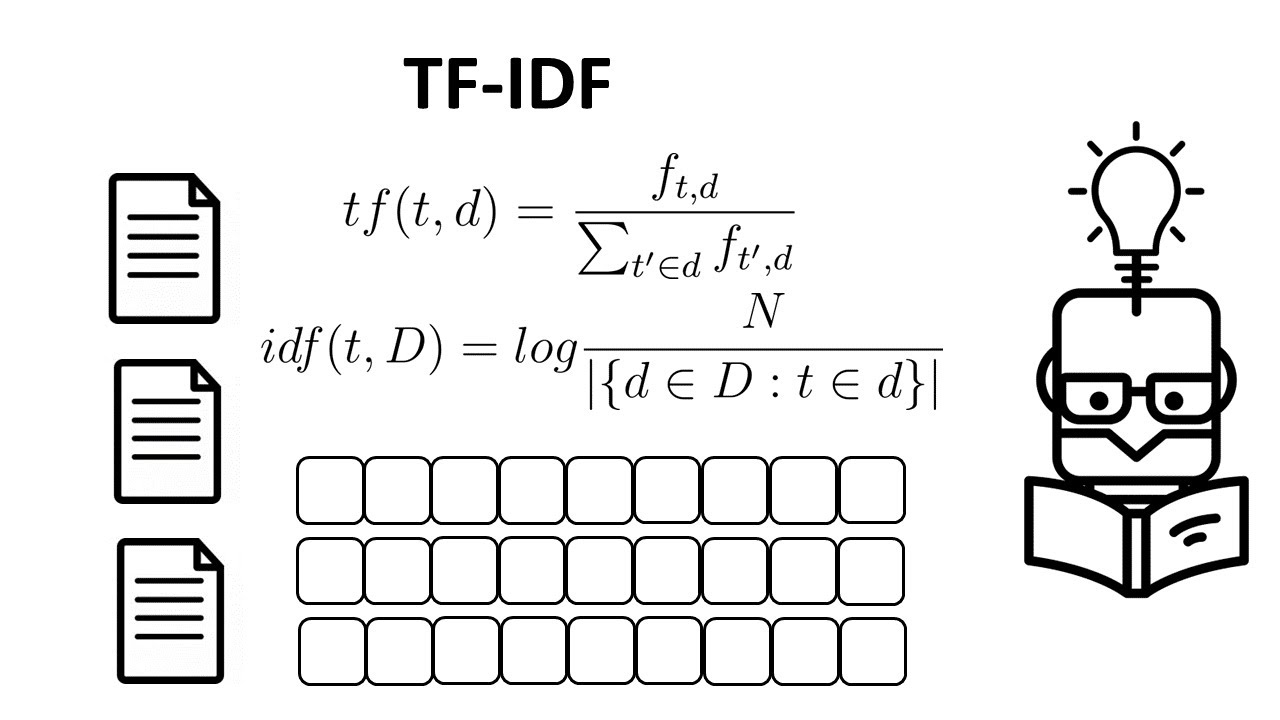

In [21]:
df = pd.DataFrame({"text":["people watch dswithbappy",
                         "dswithbappy watch dswithbappy",
                         "people write comment",
                          "dswithbappy write comment"],"output":[1,1,0,0]})

df

,text,output
0,people watch dswithbappy,1
1,dswithbappy watch dswithbappy,1
2,people write comment,0
3,dswithbappy write comment,0


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid= TfidfVectorizer()

In [23]:
arr = tfid.fit_transform(df['text']).toarray()

In [24]:
arr

array([[0.        , 0.49681612, 0.61366674, 0.61366674, 0.        ],
       [0.        , 0.8508161 , 0.        , 0.52546357, 0.        ],
       [0.57735027, 0.        , 0.57735027, 0.        , 0.57735027],
       [0.61366674, 0.49681612, 0.        , 0.        , 0.61366674]])

In [25]:
print(tfid.idf_)

[1.51082562 1.22314355 1.51082562 1.51082562 1.51082562]
